<a href="https://colab.research.google.com/github/Uditsingh7/Machine_Learning_Projects/blob/main/Udit_Customer_Segmentation_using_Kmeans_HC_%26_DBSCAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Customer Segmentation

In [ ]:
# importing libraries

import pandas as pd
import  numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
import plotly.graph_objs as go
import missingno as msno

from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

plt.style.use('fivethirtyeight')
%matplotlib inline

In [ ]:
df = pd.read_csv('./Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


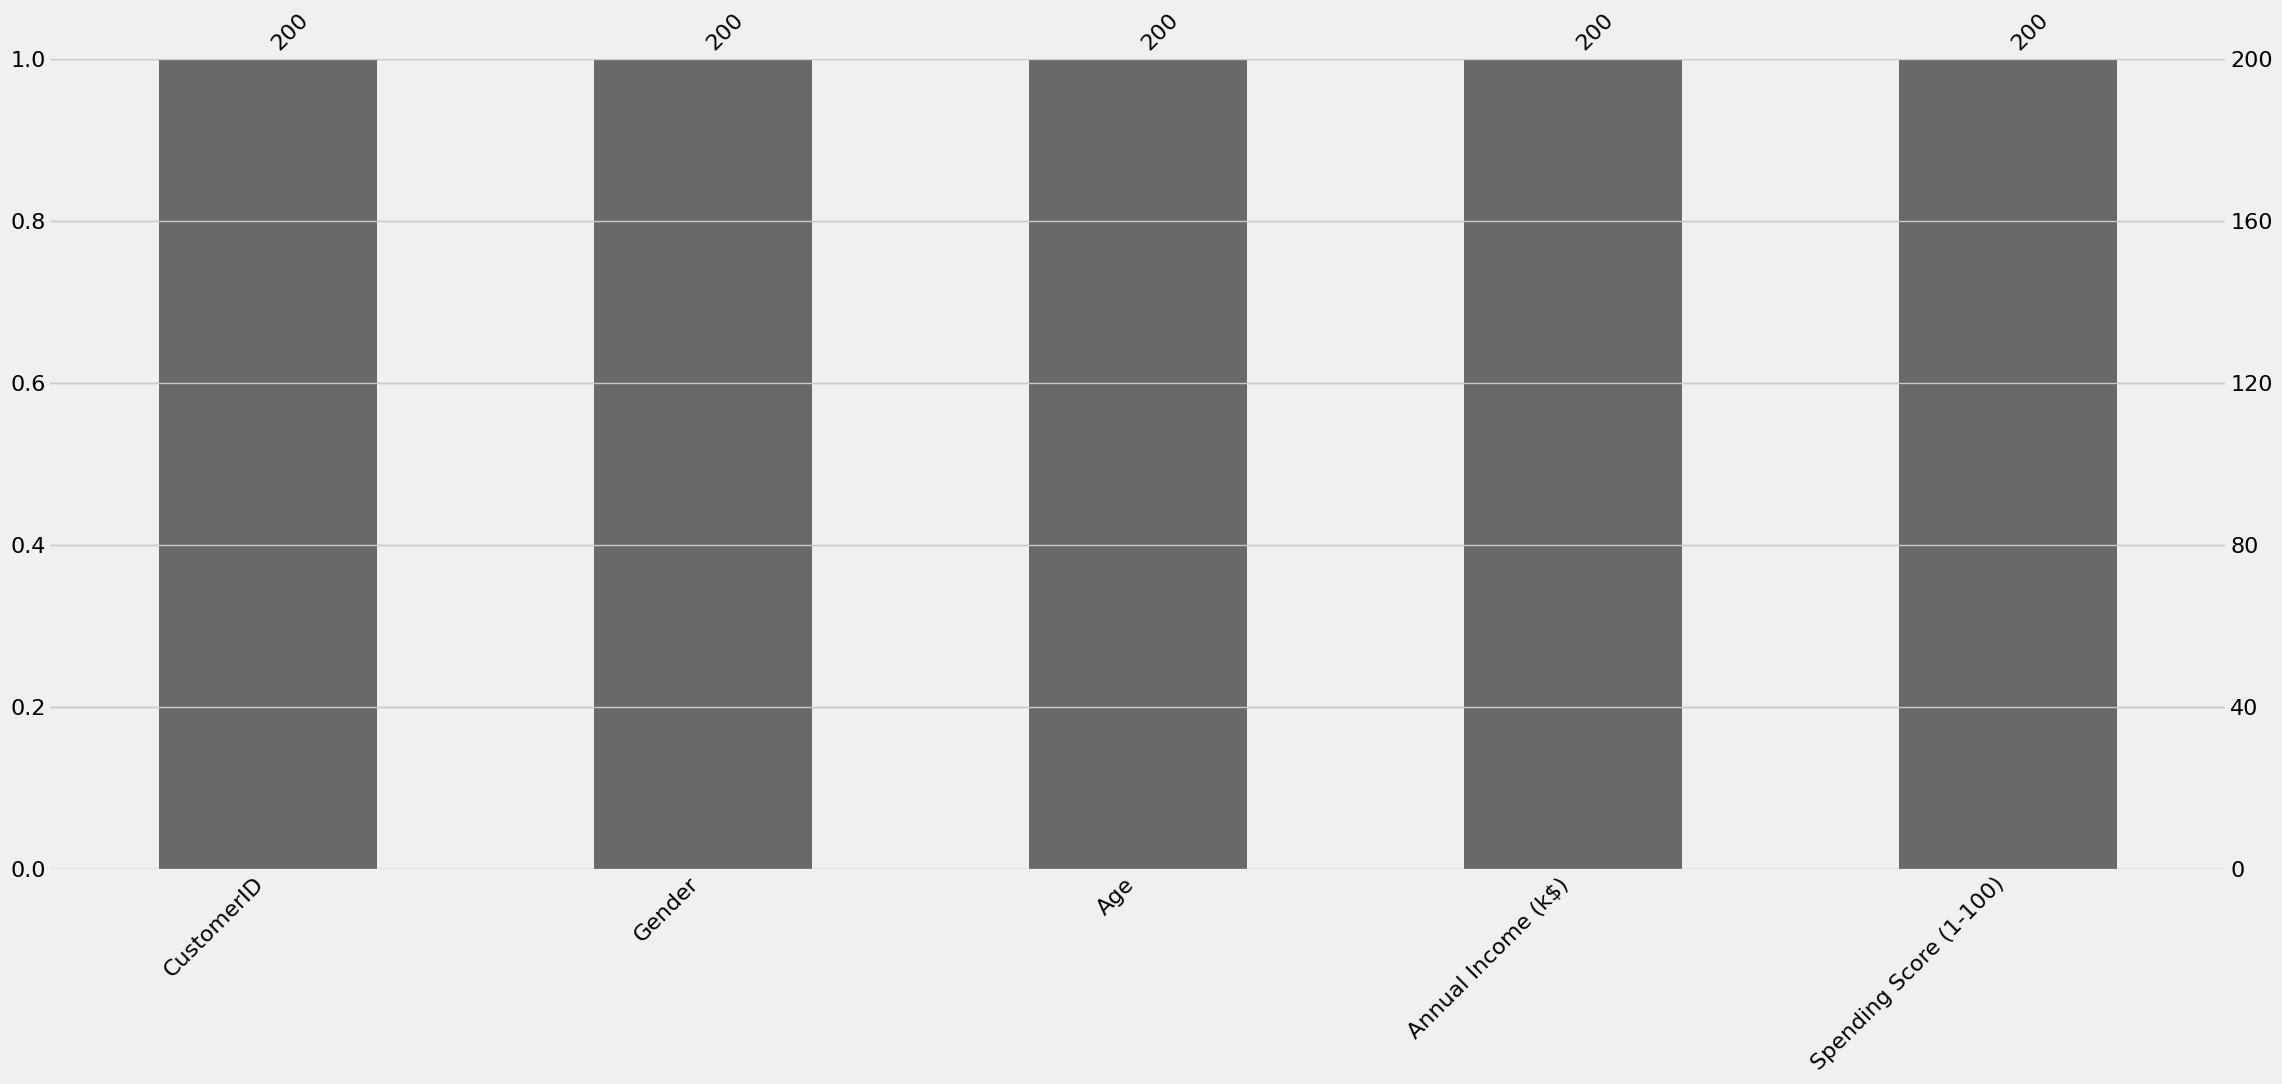

In [ ]:
msno.bar(df)
plt.show()

In [ ]:
# dropping useless column

df.drop('CustomerID', axis = 1, inplace = True)

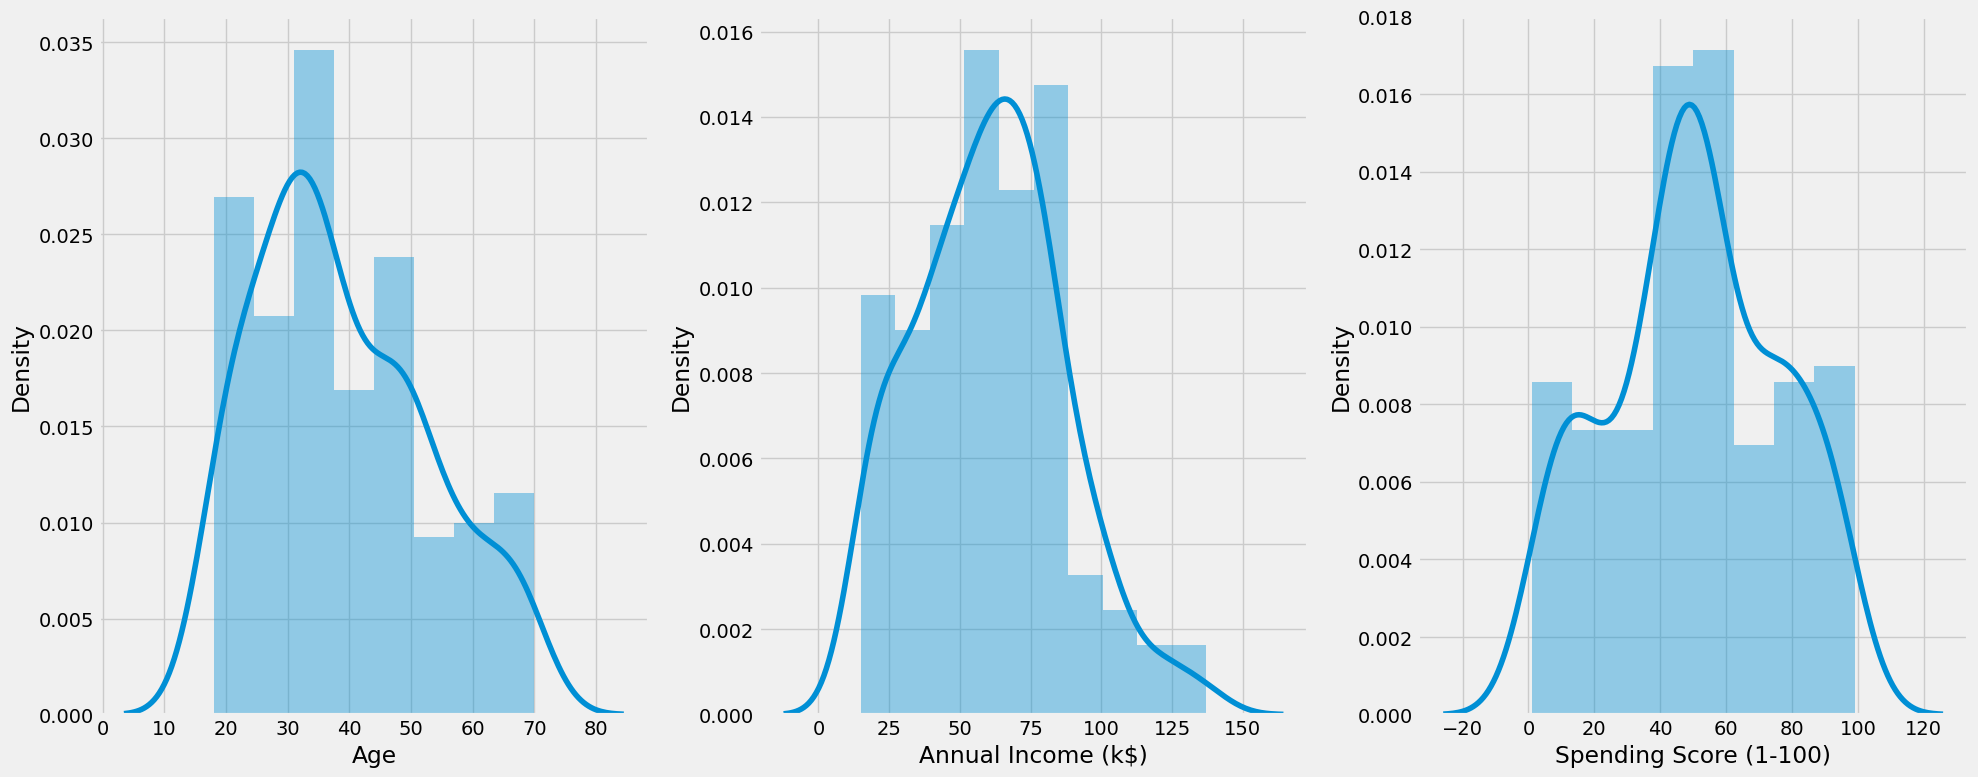

In [ ]:
# distribution plots

plt.figure(figsize = (20, 8))
plotnumber = 1

for col in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
    if plotnumber <= 3:
        ax = plt.subplot(1, 3, plotnumber)
        sns.distplot(df[col])

    plotnumber += 1

plt.tight_layout()
plt.show()

# Explanation of the plots:
# These plots visualize the distribution of each numerical feature (Age, Annual Income, Spending Score).
# `sns.distplot` shows a histogram (bars representing frequency of values) along with a Kernel Density Estimate (KDE) curve,
# which is a smoothed representation of the data's distribution.
# - The 'Age' plot shows how customer ages are distributed.
# - The 'Annual Income (k$)' plot displays the distribution of customer annual incomes.
# - The 'Spending Score (1-100)' plot illustrates the distribution of customer spending habits.

KeyError: "['CustomerID'] not found in axis"

Age group near 30-40 have the highest density.
Most customers have income in range of 50-80k.
Most of the customers have spending score of 50.

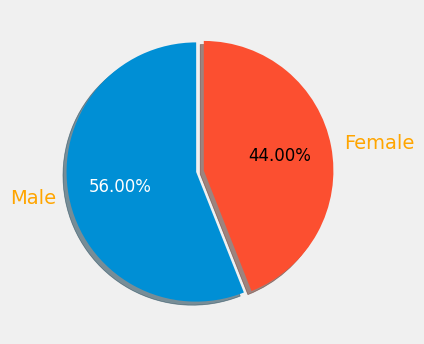

In [ ]:
values = df['Gender'].value_counts()
labels = ['Male', 'Female']

fig, ax = plt.subplots(figsize = (4, 4), dpi = 100)
explode = (0, 0.06)

patches, texts, autotexts = ax.pie(values, labels = labels, autopct = '%1.2f%%', shadow = True,
                                   startangle = 90, explode = explode)

plt.setp(texts, color = 'orange')
plt.setp(autotexts, size = 12, color = 'white')
autotexts[1].set_color('black')
plt.show()

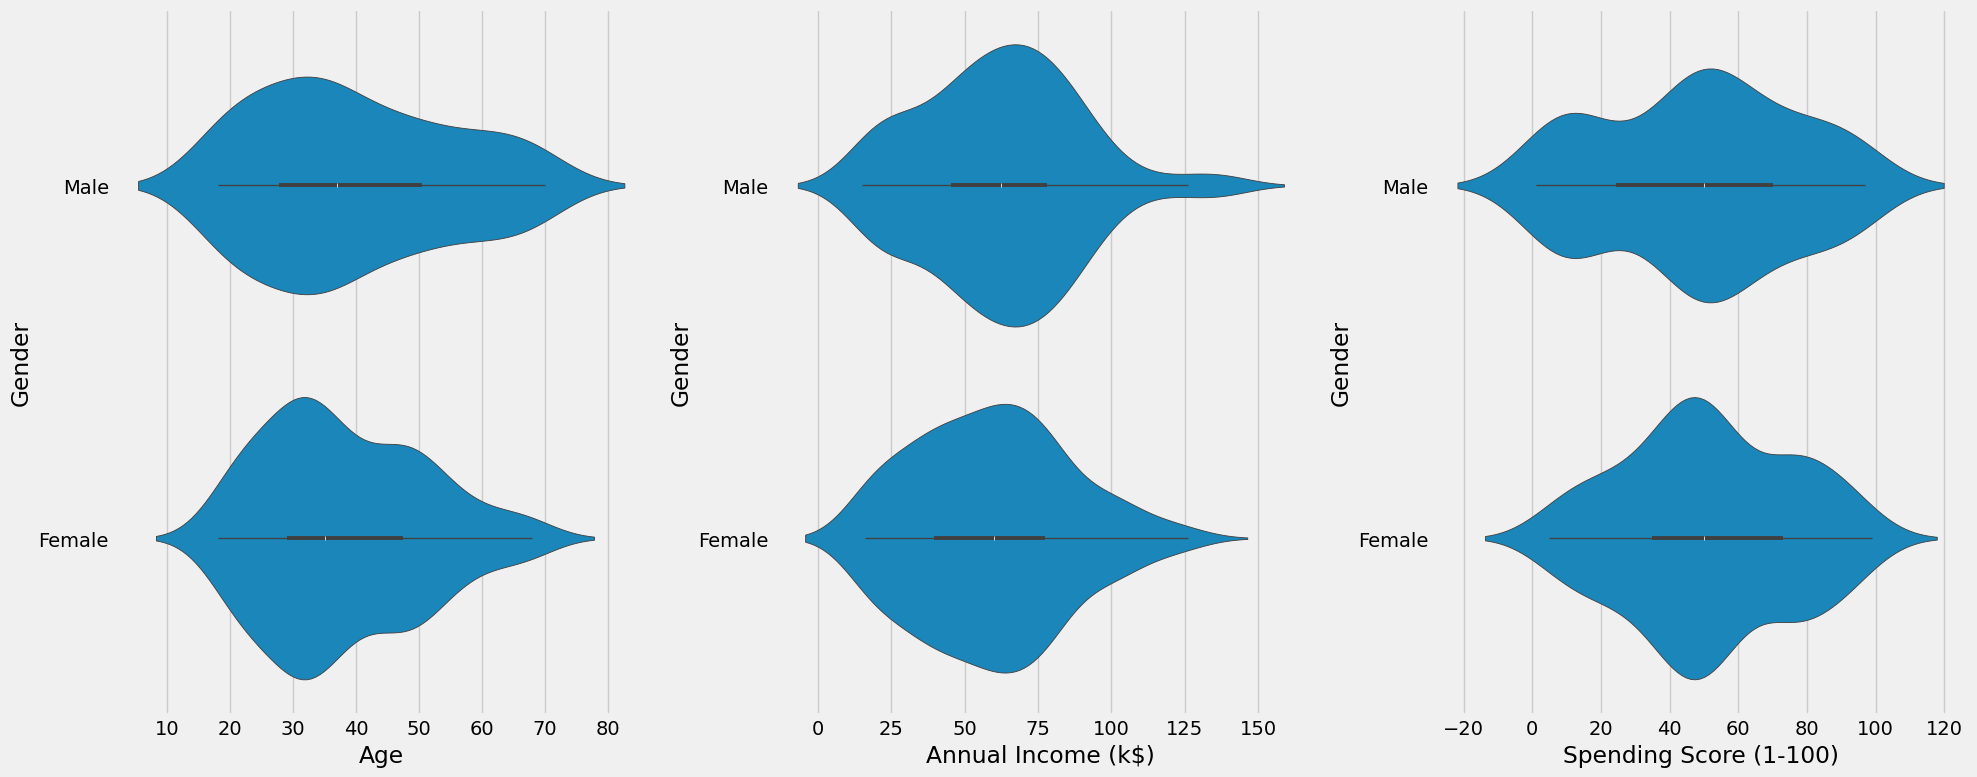

In [ ]:
plt.figure(figsize = (20, 8))
plotnumber = 1

for col in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
    if plotnumber <= 3:
        ax = plt.subplot(1, 3, plotnumber)
        sns.violinplot(x = col, y = 'Gender', data = df)

    plotnumber += 1

plt.tight_layout()
plt.show()

In [ ]:
age_18_25 = df.Age[(df.Age >= 18) & (df.Age <= 25)]
age_26_35 = df.Age[(df.Age >= 26) & (df.Age <= 35)]
age_36_45 = df.Age[(df.Age >= 36) & (df.Age <= 45)]
age_46_55 = df.Age[(df.Age >= 46) & (df.Age <= 55)]
age_55above = df.Age[df.Age >= 55]

In [ ]:
x_age = ['18-25', '26-35', '36-45', '46-55', '55+']
y_age = [len(age_18_25.values), len(age_26_35.values), len(age_36_45.values), len(age_46_55.values),
     len(age_55above.values)]

px.bar(data_frame = df, x = x_age, y = y_age, color = x_age,
       title = 'Number of customers per age group')

In [ ]:
px.scatter(data_frame = df, x = 'Annual Income (k$)', y = 'Spending Score (1-100)',
          title = 'Relation between Annual Income and Spending Score')